In [26]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score as rs
from sklearn.model_selection import GridSearchCV
import graphviz as gv
from IPython.display import Image

%matplotlib inline

In [27]:
df = pd.read_csv('0_merged_data.csv')

In [59]:
df.head(5)

,Unnamed: 0,PERIOD,PARK,BOROUGH,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,...,Street_light,Drinking,Drugs,311_Total,household,median_income,average_score,public_house,business,CRIME_HAPPEN
0,0,2014-q3,bronx park,BRONX,718.373,ONE ACRE OR LARGER,0.0,0.0,1.0,0.0,...,17.0,1.0,0.0,18.0,1069.0,34453.0,0.625,0.0,0.0,1
1,1,2014-q4,bronx park,BRONX,718.373,ONE ACRE OR LARGER,0.0,1.0,0.0,0.0,...,20.0,0.0,0.0,20.0,1069.0,34453.0,0.625,0.0,0.0,1
2,2,2015-q1,bronx park,BRONX,718.373,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,10.0,1069.0,34453.0,0.625,0.0,0.0,0
3,3,2015-q2,bronx park,BRONX,718.373,ONE ACRE OR LARGER,0.0,0.0,0.0,1.0,...,24.0,0.0,0.0,24.0,1069.0,34453.0,0.625,0.0,0.0,1
4,4,2015-q3,bronx park,BRONX,718.373,ONE ACRE OR LARGER,1.0,0.0,1.0,2.0,...,16.0,1.0,0.0,17.0,1069.0,34453.0,0.625,0.0,0.0,1


In [29]:
len(df[df['CRIME_TOT'] > 1])

92

In [30]:
def label(row):
    if row['CRIME_TOT'] > 0:
        return 1
    if row['CRIME_TOT'] < 1:
        return 0

In [31]:
df['CRIME_HAPPEN'] = df.apply(lambda row: label(row), axis=1)

In [32]:
df = df.fillna(0)

In [33]:
y = df.loc[:,"CRIME_HAPPEN"]

In [41]:
X = pd.concat([df.iloc[:,4],df.iloc[:,14:23]], axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.1, random_state=908)

X_train.shape

(3863, 10)

In [43]:
from sklearn.preprocessing import label_binarize

Y_test = label_binarize(Y_test, classes=[0, 1])

In [44]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score

In [52]:
score_dic = {}
for i in range(1,20):
    clf = RFC(max_depth=i, random_state=908)
    score_dic[i] = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=5)

avgScore_dict = {}
for k, v in score_dic.iteritems():
    avgScore_dict[k] = np.mean(v)
    print k, avgScore_dict[k]

1 0.902148952
2 0.903442613061
3 0.904478882491
4 0.905255749419
5 0.905773213843
6 0.905514146485
7 0.905255749419
8 0.905255749419
9 0.906033286636
10 0.904998357788
11 0.902927494654
12 0.901114358297
13 0.898784427806
14 0.894384974764
15 0.892054038837
16 0.891277171909
17 0.889464705843
18 0.888948917145
19 0.885324655303


In [53]:
rf = rfc(n_estimators=30, n_jobs=-1,max_depth=6)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [54]:
pred_rf=rf.predict(X_test)
print rs(Y_test,pred_rf)

0.498717948718


In [55]:
feature_importance = rf.feature_importances_

In [56]:
feature_importance

array([ 0.21577463,  0.0651252 ,  0.03185448,  0.        ,  0.06360682,
        0.11710893,  0.21726553,  0.06124206,  0.08477517,  0.1432472 ])

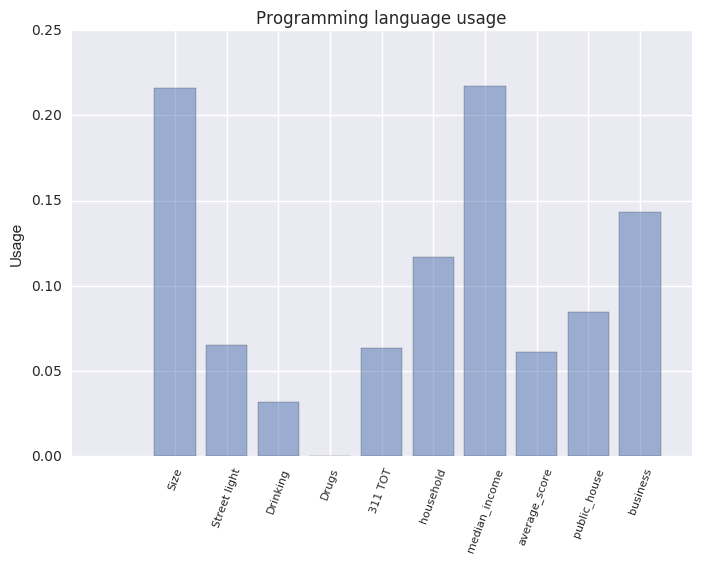

In [65]:
import seaborn
objects = ('Size', 'Street light', 'Drinking', 'Drugs', '311 TOT', 'household','median_income','average_score','public_house','business')
y_pos = np.arange(len(objects))
performance = list(feature_importance)
 
plt.bar(y_pos, performance, align='center', alpha=0.5, )
plt.xticks(y_pos, objects, fontsize = 8, rotation=70)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

In [15]:
from sklearn.tree import export_graphviz

In [107]:
from sklearn import tree
i_tree = 0
for tree_in_forest in rf.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [24]:
for tree_in_forest in rf.estimators_:
    export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True,out_file='tree.dot')

In [83]:
rf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1168956332, splitter='best')

In [30]:
tree_in_forest = rf.estimators_[1]

In [26]:
X_train_simple = X_train.iloc[:,[0,1,2]]
X_test_simple = X_test.iloc[:,[0,1,2]]
dtc = DTC(max_depth=6)
dtc.fit(X_train_simple, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

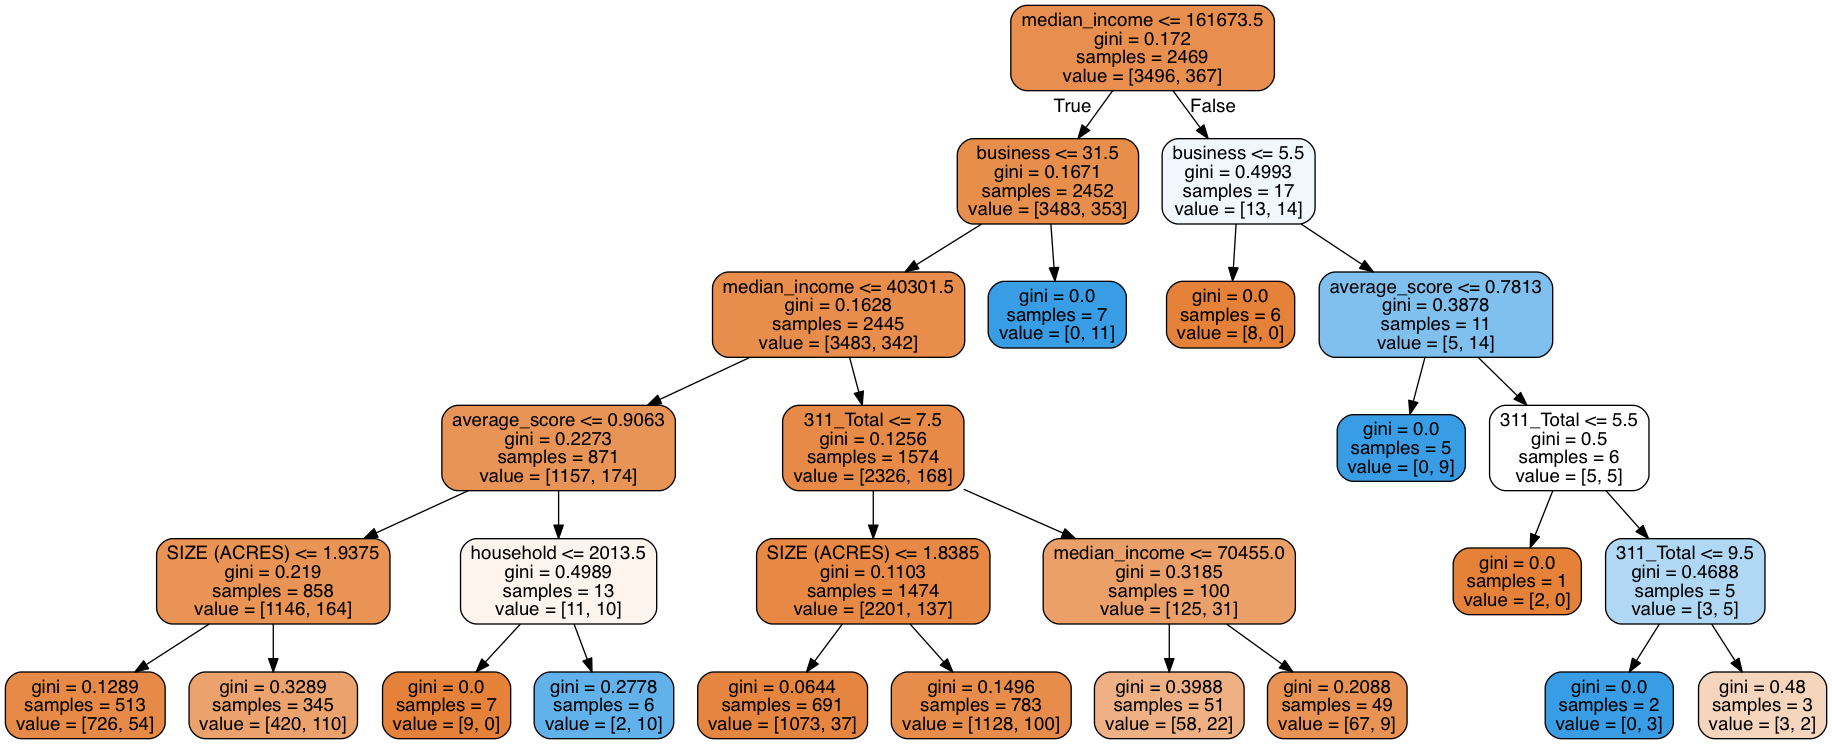

In [31]:
from sklearn.externals.six import StringIO as SIO
from sklearn import tree
import pydotplus
dot_data = SIO()  
tree.export_graphviz(tree_in_forest,feature_names=X.columns,
                filled=True,
                rounded=True,out_file=dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [40]:
fig = graph.create_png()

In [37]:
import matplotlib.pyplot as ply
ply.savefig('graph_.png')